In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn

In [2]:
!cp -r /kaggle/input/imageclassificationsport/ /kaggle/working

In [3]:
import tarfile
my_tar = tarfile.open('/kaggle/working/imageclassificationsport/data-z3.tar.xz')
my_tar.extractall('/kaggle/working/imageclassificationsport/data/') # specify which folder to extract to
my_tar.close()

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename
import glob
import os


Analyzujete početnosti v triedach, zobrazte si reprezentanta z triedy

In [6]:
class_name = {}

for filepath in glob.iglob('/kaggle/working/imageclassificationsport/data/train/*'):
    filename = basename(filepath)
    count = 0
    for path in os.listdir(filepath):
        # check if current path is a file
        if os.path.isfile(os.path.join(filepath, path)):
            count += 1
    class_name[filename] = [count]


In [42]:
class_labels = class_name.keys()

In [7]:
import pandas as pd
count_df = pd.DataFrame(class_name).transpose()

In [8]:
count_df.columns = ['amount']

count_df.head()

,amount
rock climbing,141
croquet,136
frisbee,133
bmx,140
jai alai,132


In [9]:
import plotly.express as px

fig = px.bar(count_df, x="amount",title="Amount of classes",template="plotly_dark", height=500)
fig.show()

Analyzujte triedy podľa farebnosti pixelov obrázkov

In [10]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [11]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [12]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [13]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (1, 1))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

['#a27e5d', '#789dc7', '#dee0e5', '#9fbfd9', '#5b3e1f']


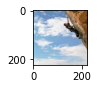

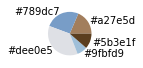

In [14]:
from matplotlib.pyplot import figure
plt.figure(figsize=(1,1))

for dirpath in glob.iglob('/kaggle/working/imageclassificationsport/data/train/*'):
    count = 0
    for imagepath in glob.iglob(dirpath+'/*'):
        filename = basename(imagepath)
        image = cv2.imread(imagepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        modified_image = prep_image(image)
        color_analysis(modified_image)
        break
    break  
            

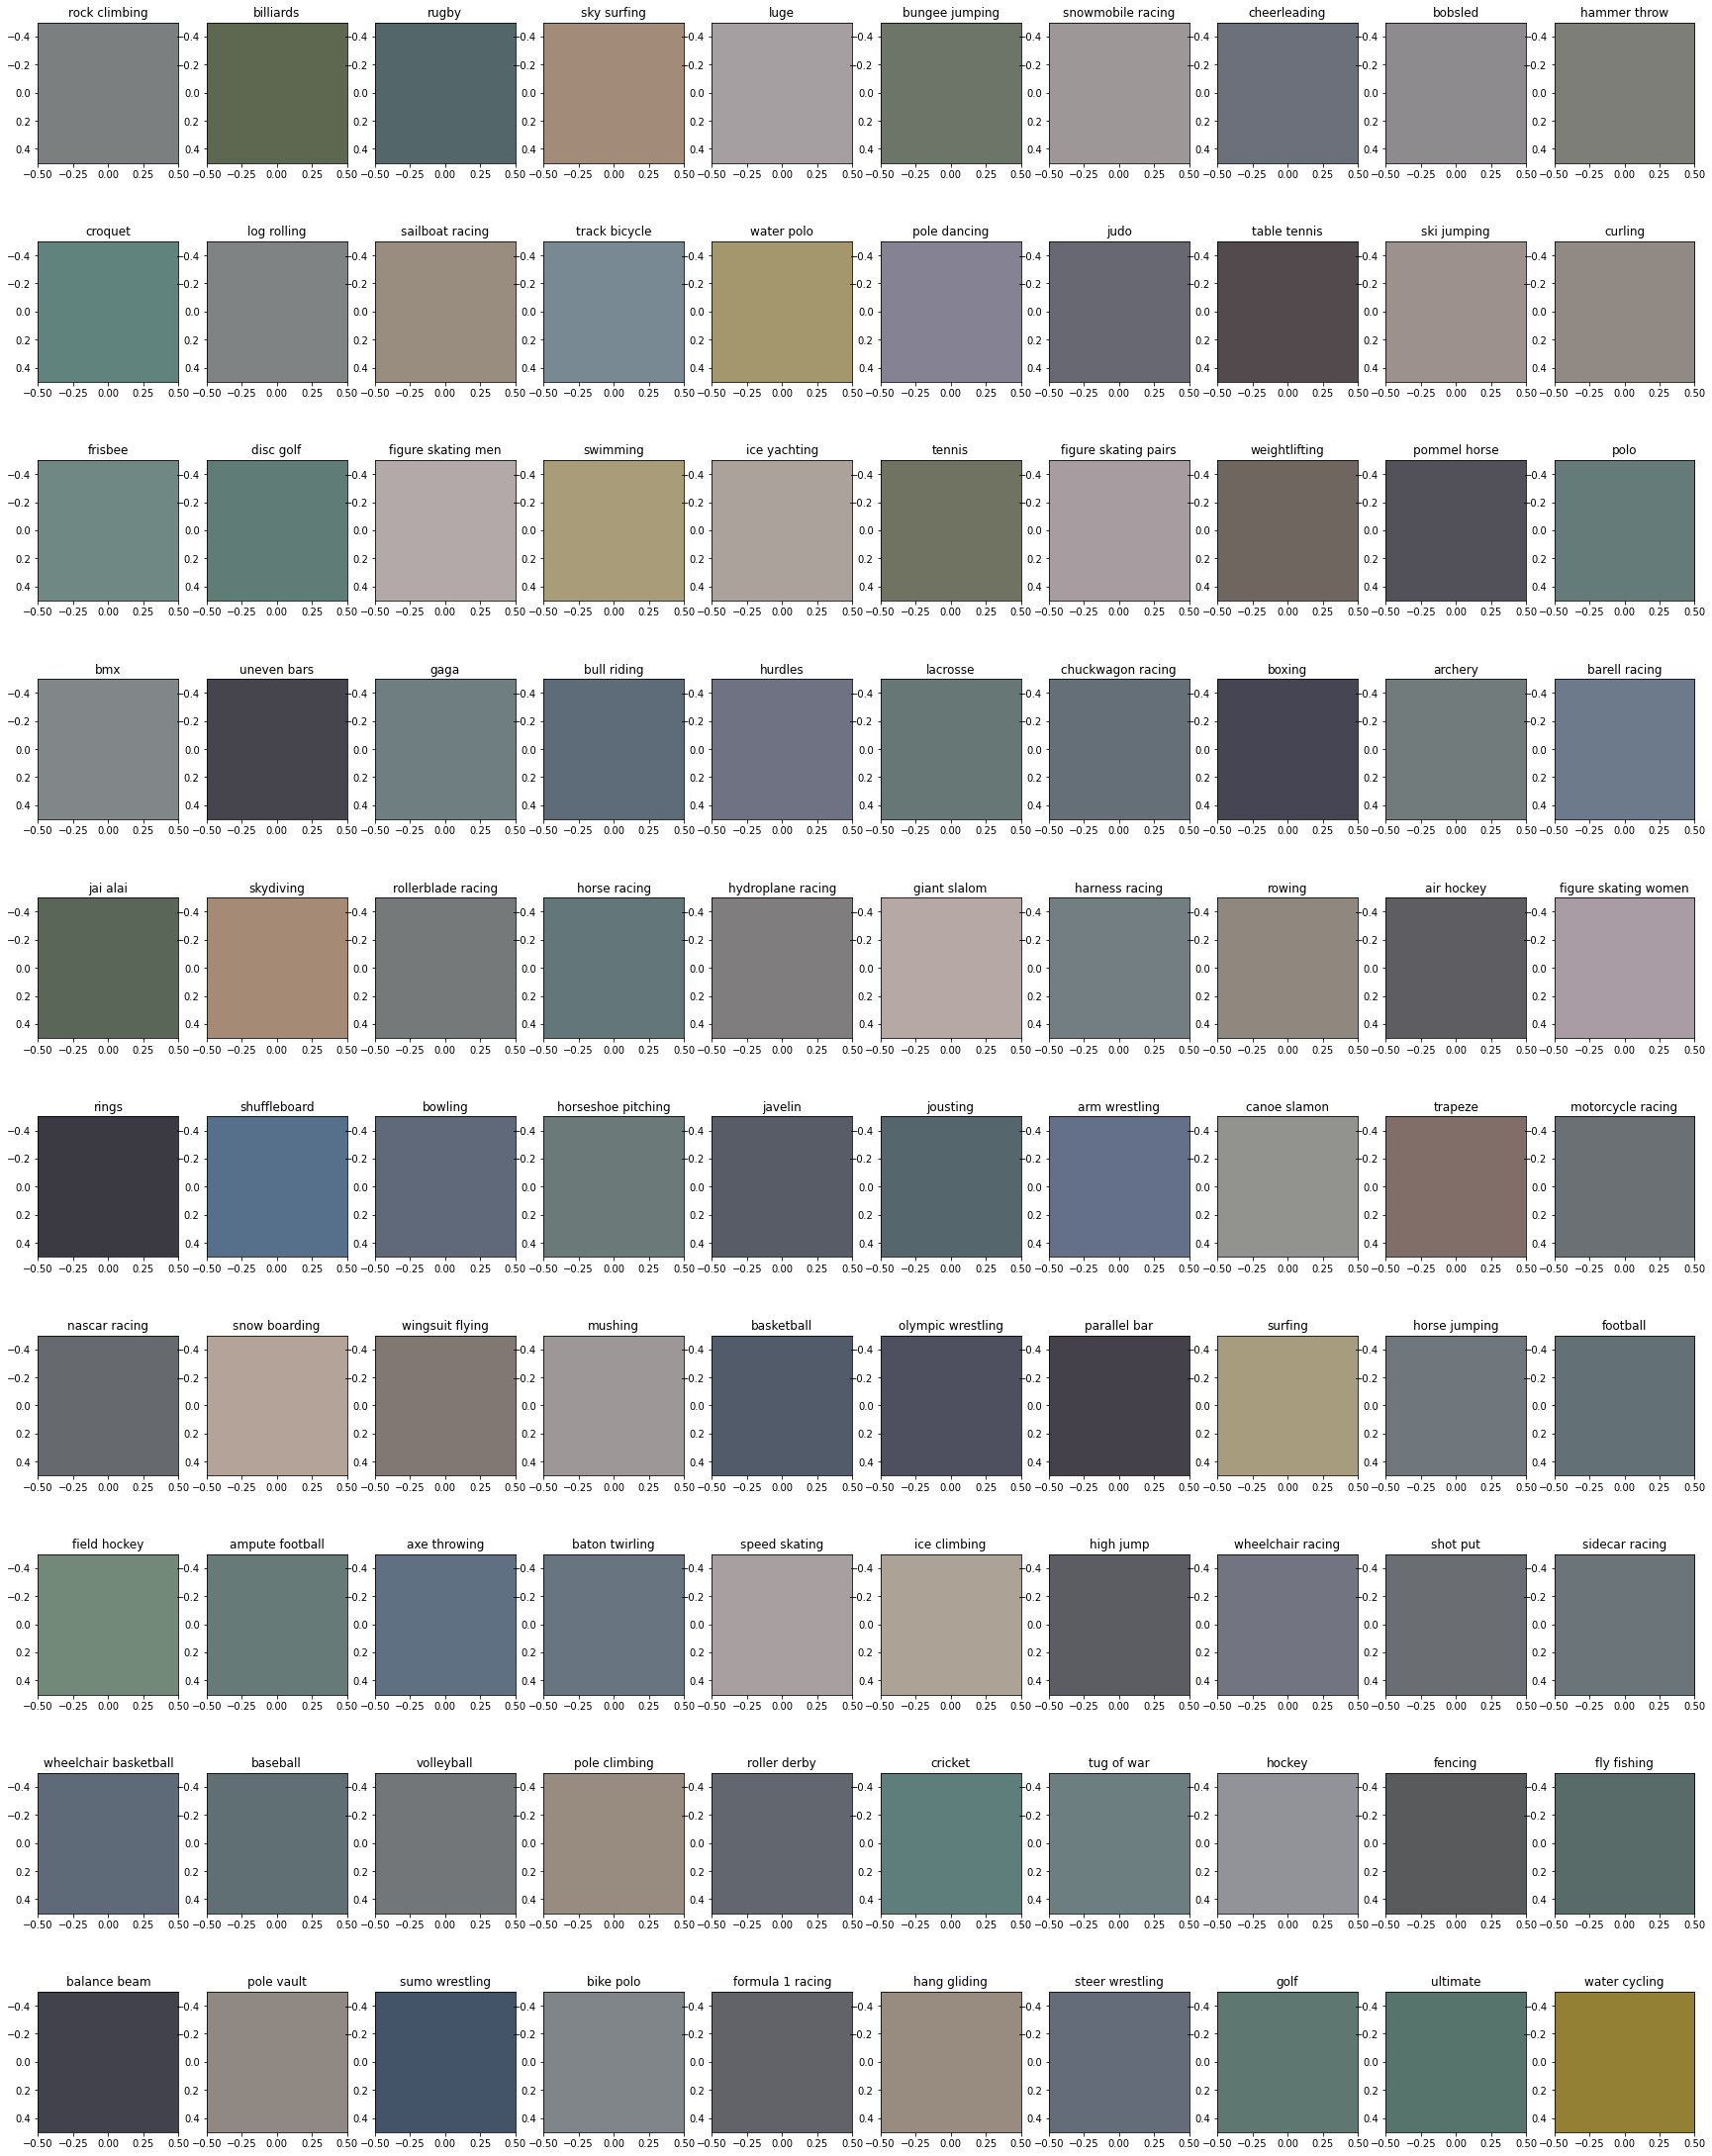

<Figure size 720x720 with 0 Axes>

In [15]:
import cv2
import numpy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure, axis = plt.subplots(nrows=10, ncols=10, figsize=(30,40))
j = 0
plt.figure(figsize = (10, 10))
for (i,dirpath) in enumerate(glob.iglob('/kaggle/working/imageclassificationsport/data/train/*')):
    filename = basename(dirpath)
    colors = []
    for imagepath in glob.iglob(dirpath+'/*'):
        myimg = cv2.imread(imagepath)
        colors.append(myimg)    
    averageIm = np.mean(colors, axis=0)
    averageColor = averageIm.mean(axis=(0,1))
    averageColor = numpy.round(averageColor,0)
    averageColor = [int(a) for a in averageColor]
    axis[i%10,j].imshow([[averageColor]])
    axis[i%10,j].set_title(filename)
    if ((i+1)%10 == 0):
        j+=1
    

Analyzujte triedy podľa predpovedí z ľubovoľného modelu natrénovaného na
probléme ImageNet

Správne vytvorte trénovaciu, validačnú a testovaciu množinu, pripravte si generátor dát (odporúčame aj augmentovať množinu), nezabudnite dáta normalizovať a vhodne im zmeniť veľkosť

In [16]:
import cv2

isExist = os.path.exists('/kaggle/working/compress/')
if not isExist:
    os.makedirs('/kaggle/working/compress/')
    
for dat in glob.iglob('/kaggle/working/imageclassificationsport/data/*'):
    dataname = basename(dat)
    isExist = os.path.exists('/kaggle/working/compress/'+dataname+'/')
    if not isExist:
        os.makedirs('/kaggle/working/compress/'+dataname+'/')
    #print(dataname)
    for path in glob.iglob(dat+'/*'):
        pathname = basename(path)
        isExist = os.path.exists('/kaggle/working/compress/'+dataname+'/'+pathname+"/")
        if not isExist:
            os.makedirs('/kaggle/working/compress/'+dataname+'/'+pathname+"/")
        #print(pathname)
        for imgpath in glob.iglob(path+'/*'):
            love = imgpath
            imgname = basename(imgpath)
            img = cv2.imread(imgpath, cv2.IMREAD_UNCHANGED)
            scale_percent = 30 # percent of original size
            width = int(img.shape[1] * scale_percent / 100)
            height = int(img.shape[0] * scale_percent / 100)
            dim = (width, height)
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            #plt.imshow(resized)
            cv2.imwrite("/kaggle/working/compress/"+dataname+"/"+pathname+"/"+imgname, resized)

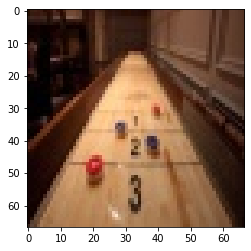

In [17]:
path = '/kaggle/working/compress/test/shuffleboard/5.jpg'
  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

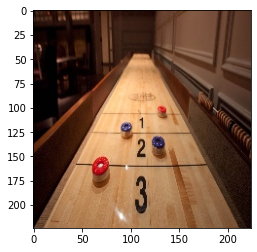

In [18]:
path = '/kaggle/working/imageclassificationsport/data/test/shuffleboard/5.jpg'
  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [19]:
import PIL
from PIL import Image

img = PIL.Image.open("/kaggle/working/compress/test/shuffleboard/5.jpg")
wid, hgt = img.size
print(wid,hgt)

67 67


In [20]:
for dat in glob.iglob('/kaggle/working/compress/test/*'):
    dataname = basename(dat)
    print(dataname)

rock climbing
croquet
frisbee
bmx
jai alai
rings
nascar racing
field hockey
wheelchair basketball
balance beam
billiards
log rolling
disc golf
uneven bars
skydiving
shuffleboard
snow boarding
ampute football
baseball
pole vault
rugby
sailboat racing
figure skating men
gaga
rollerblade racing
bowling
wingsuit flying
axe throwing
volleyball
sumo wrestling
sky surfing
track bicycle
swimming
bull riding
horse racing
horseshoe pitching
mushing
baton twirling
pole climbing
bike polo
luge
water polo
ice yachting
hurdles
hydroplane racing
javelin
basketball
speed skating
roller derby
formula 1 racing
bungee jumping
pole dancing
tennis
lacrosse
giant slalom
jousting
olympic wrestling
ice climbing
cricket
hang gliding
snowmobile racing
judo
figure skating pairs
chuckwagon racing
harness racing
arm wrestling
parallel bar
high jump
tug of war
steer wrestling
cheerleading
table tennis
weightlifting
boxing
rowing
canoe slamon
surfing
wheelchair racing
hockey
golf
bobsled
ski jumping
pommel horse
arc

In [21]:
image_size = (wid, hgt)
batch_size = 64

train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/train",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/valid",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 13572 files belonging to 100 classes.


2022-11-29 13:11:37.197927: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 13:11:37.201602: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 13:11:37.202276: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 13:11:37.204908: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


Zobrazte si reprezentanta z triedy

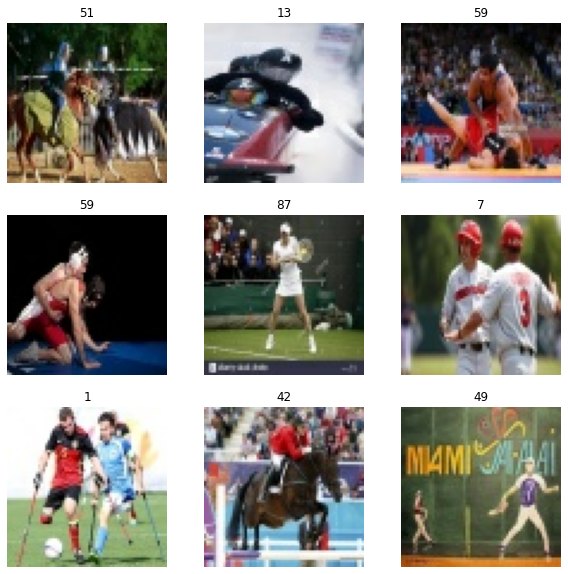

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [29]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

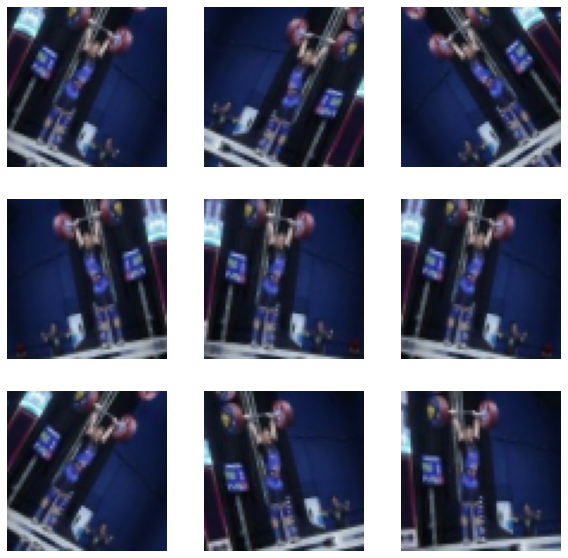

In [30]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [31]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

Navrhnite sieť s aspoň 2 konvolučnými vrstvami. Ak budete sledovať pretrenovanie,
riešte ho regularizáciou. Skúste niekoľko (cielených) konfigurácii hyperparametrov, výsledky zobrazte v tabuľke. Dopracujte sa aspoň ku viditeľnej diagonálena konfúznej matici.

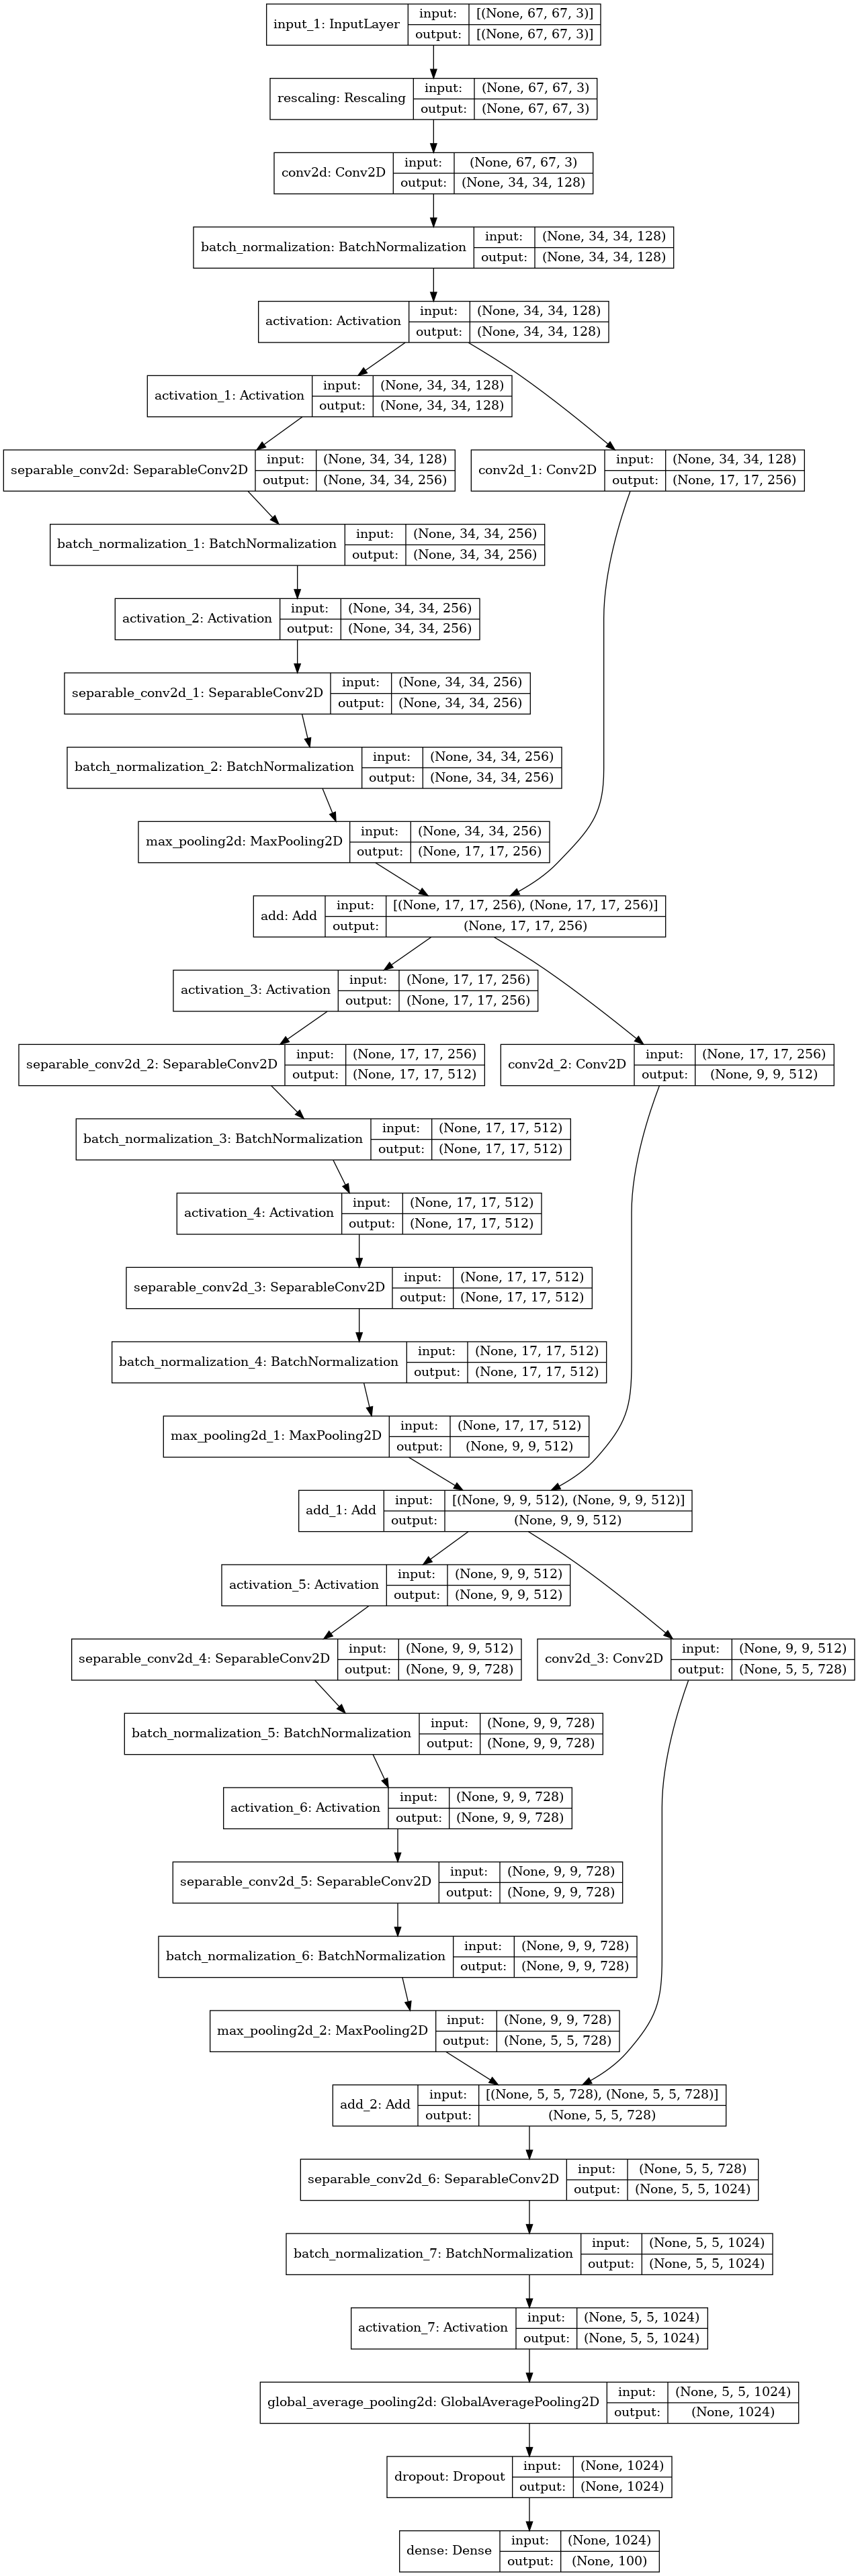

In [32]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=100)
keras.utils.plot_model(model, show_shapes=True)

In [71]:
def plot_to_image(figure):
    """
    Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call.
    """
    
    buf = io.BytesIO()
    
    # Use plt.savefig to save the plot to a PNG in memory.
    plt.savefig(buf, format='png')
    
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    
    # Use tf.image.decode_png to convert the PNG buffer
    # to a TF image. Make sure you use 4 channels.
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    
    # Use tf.expand_dims to add the batch dimension
    image = tf.expand_dims(image, 0)
    
    return image

In [80]:
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

In [72]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras

logdir = "./file/kaggle/working/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir = logdir, histogram_freq = 1)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

2022-11-29 13:31:22.708287: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-29 13:31:22.708335: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-29 13:31:23.130907: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-29 13:31:23.131090: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [73]:
def plot_to_image(figure):
    """
    Converts the matplotlib plot specified by 'figure' to a PNG image and
    returns it. The supplied figure is closed and inaccessible after this call.
    """
    
    buf = io.BytesIO()
    
    # Use plt.savefig to save the plot to a PNG in memory.
    plt.savefig(buf, format='png')
    
    # Closing the figure prevents it from being displayed directly inside
    # the notebook.
    plt.close(figure)
    buf.seek(0)
    
    # Use tf.image.decode_png to convert the PNG buffer
    # to a TF image. Make sure you use 4 channels.
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    
    # Use tf.expand_dims to add the batch dimension
    image = tf.expand_dims(image, 0)
    
    return image

In [74]:
import tensorflow_datasets as tfds
builder = tfds.ImageFolder('/kaggle/working/compress/')
print(builder.info.features['label'])
class_names = builder.info.features['label'].names

ClassLabel(shape=(), dtype=tf.int64, num_classes=100)


In [81]:

def log_confusion_matrix(epoch, logs):
    
    # Use the model to predict the values from the test_images.
    test_pred_raw = model.predict(val_ds)
    test_labels = np.concatenate([y for x, y in test_ds], axis=0)
    test_pred = np.argmax(test_pred_raw, axis=1)
    
    # Calculate the confusion matrix using sklearn.metrics
    cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
    
    figure = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figure)
    
    # Log the confusion matrix as an image summary.
    with file_writer_cm.as_default():
        tf.summary.image("Confusion Matrix", cm_image, step=epoch)

In [82]:
train_ds

<PrefetchDataset shapes: ((None, 67, 67, 3), (None,)), types: (tf.float32, tf.int32)>

In [83]:
val_ds

<PrefetchDataset shapes: ((None, 67, 67, 3), (None,)), types: (tf.float32, tf.int32)>

In [84]:
test_ds

<BatchDataset shapes: ((None, 67, 67, 3), (None,)), types: (tf.float32, tf.int32)>

2022-11-29 13:34:30.838953: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-29 13:34:30.839007: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-29 13:34:31.108225: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-29 13:34:31.108425: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 1/50
  1/213 [..............................] - ETA: 4:49 - loss: 2.2680 - accuracy: 0.3750

2022-11-29 13:34:32.781833: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-29 13:34:32.781882: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/213 [..............................] - ETA: 1:23 - loss: 2.2491 - accuracy: 0.3750

2022-11-29 13:34:33.259926: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-29 13:34:33.260655: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-11-29 13:34:33.395922: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 381 callback api events and 378 activity events. 
2022-11-29 13:34:33.406616: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-29 13:34:33.423935: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs/train/plugins/profile/2022_11_29_13_34_33

2022-11-29 13:34:33.436142: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /kaggle/working/logs/train/plugins/profile/2022_11_29_13_34_33/6b4c72fe24c0.trace.json.gz
2022-11-29 13:34:33.457499: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Cre

  4/213 [..............................] - ETA: 1:01 - loss: 2.4290 - accuracy: 0.3555

2022-11-29 13:34:33.461980: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to /kaggle/working/logs/train/plugins/profile/2022_11_29_13_34_33/6b4c72fe24c0.memory_profile.json.gz
2022-11-29 13:34:33.463438: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: /kaggle/working/logs/train/plugins/profile/2022_11_29_13_34_33
Dumped tool data for xplane.pb to /kaggle/working/logs/train/plugins/profile/2022_11_29_13_34_33/6b4c72fe24c0.xplane.pb
Dumped tool data for overview_page.pb to /kaggle/working/logs/train/plugins/profile/2022_11_29_13_34_33/6b4c72fe24c0.overview_page.pb
Dumped tool data for input_pipeline.pb to /kaggle/working/logs/train/plugins/profile/2022_11_29_13_34_33/6b4c72fe24c0.input_pipeline.pb
Dumped tool data for tensorflow_stats.pb to /kaggle/working/logs/train/plugins/profile/2022_11_29_13_34_33/6b4c72fe24c0.tensorflow_stats.pb
Dumped tool data for kernel_stats.pb to /kaggle/working/

213/213 [==============================] - 19s 82ms/step - loss: 2.4247 - accuracy: 0.3630 - val_loss: 3.1031 - val_accuracy: 0.3060


NameError: name 'itertools' is not defined

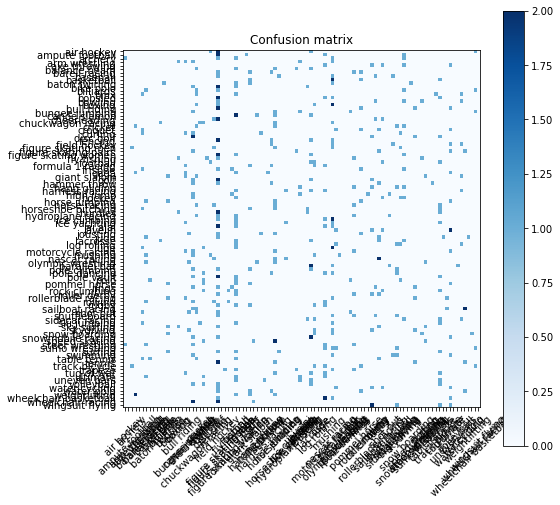

In [85]:
epochs = 50

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
    tf.keras.callbacks.TensorBoard(log_dir='/kaggle/working/logs',histogram_freq = 1),
    keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf

%load_ext tensorboard

In [ ]:
import os

# folder path
dir_path = '/kaggle/working/logs/'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    print(path)

In [ ]:
#tensorboard --logdir /kaggle/working/logs/train --bind_all

In [ ]:
!zip -r file.zip /kaggle/working/logs

In [ ]:
from IPython.display import FileLink
FileLink(r'file.zip')